In [2]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

In [3]:
# Каталог с данными для обучения
train_dir = 'C:/Users/leva2/Desktop/catsndogs/train/'
# Каталог с данными для проверки
val_dir = 'C:/Users/leva2/Desktop/catsndogs/val/'
# Каталог с данными для тестирования
test_dir = 'C:/Users/leva2/Desktop/catsndogs/test/'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 50
# Размер мини-выборки
batch_size = 16
# Количество изображений для обучения
nb_train_samples = 1824
# Количество изображений для проверки
nb_validation_samples = 912
# Количество изображений для тестирования
nb_test_samples = 912

In [4]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape,activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
datagen = ImageDataGenerator(rescale=1. / 255, 
                             horizontal_flip=True, 
                             rotation_range=45, 
                             zoom_range=0.5,
                             width_shift_range=.15,
                             height_shift_range=.15)

In [8]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1824 images belonging to 4 classes.


In [9]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 912 images belonging to 4 classes.


In [10]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 916 images belonging to 4 classes.


In [11]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
114/114 [==============================] - 110s 961ms/step - loss: 1.2640 - acc: 0.4084 - val_loss: 1.0942 - val_acc: 0.5099
Epoch 2/50
114/114 [==============================] - 107s 943ms/step - loss: 1.0883 - acc: 0.4962 - val_loss: 0.9863 - val_acc: 0.5888
Epoch 3/50
114/114 [==============================] - 107s 938ms/step - loss: 1.0390 - acc: 0.5291 - val_loss: 0.9707 - val_acc: 0.5899
Epoch 4/50
114/114 [==============================] - 104s 916ms/step - loss: 0.9730 - acc: 0.5779 - val_loss: 0.8838 - val_acc: 0.6096
Epoch 5/50
114/114 [==============================] - 118s 1s/step - loss: 0.9578 - acc: 0.5833 - val_loss: 0.9489 - val_acc: 0.5877
Epoch 6/50
114/114 [==============================] - 123s 1s/step - loss: 0.9312 - acc: 0.5828 - val_loss: 0.9072 - val_acc: 0.5998
Epoch 7/50
114/114 [==============================] - 124s 1s/step - loss: 0.9349 - acc: 0.5910 - val_loss: 0.9682 - val_acc: 0.5888
Epoch 8/5

In [18]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

In [19]:
print("Точность предикта на тестовых данных: %.2f%%" % (scores[1]*100))

Точность предикта на тестовых данных: 68.23%


In [20]:
model.save('C:/Users/leva2/Desktop/Neiro.h5')

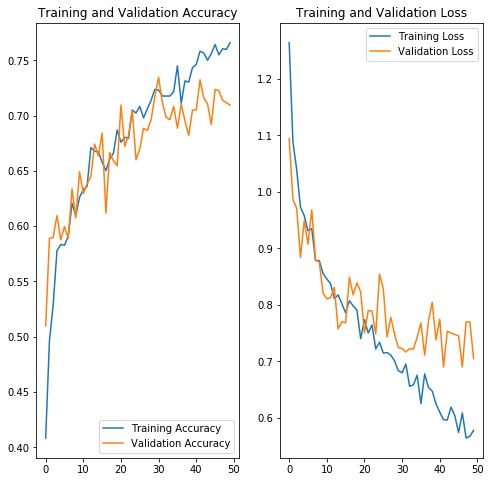

In [21]:
from matplotlib import pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean

img = io.imread('C:/Users/leva2/Desktop/catsndogs/data/duck.185.jpg')
img = img/255
img = resize(img, (150, 150),
                       anti_aliasing=True)
img = img.reshape((1,img_width, img_height, 3))
model.predict(img)

array([[0.00532185, 0.20546162, 0.671     , 0.11821648]], dtype=float32)

In [49]:
labels = (train_generator.class_indices)
labels

{'cats': 0, 'dogs': 1, 'ducks': 2, 'frogs': 3}

array([[[[0.09491333, 0.26091646, 0.02749647],
         [0.10516165, 0.26445543, 0.02696017],
         [0.06452441, 0.20432405, 0.02914727],
         ...,
         [0.19964902, 0.36432029, 0.14740303],
         [0.19738349, 0.3497182 , 0.12396585],
         [0.16423135, 0.33704806, 0.10233766]],

        [[0.09532227, 0.27527403, 0.01340911],
         [0.07927726, 0.24563562, 0.01064025],
         [0.07082511, 0.20723209, 0.02317531],
         ...,
         [0.19900532, 0.35980706, 0.13451835],
         [0.18787289, 0.35027502, 0.10915189],
         [0.16024884, 0.34006353, 0.07513867]],

        [[0.16332506, 0.27932833, 0.0434927 ],
         [0.12932063, 0.28644753, 0.02062868],
         [0.0773558 , 0.21574315, 0.02132885],
         ...,
         [0.18315444, 0.34083704, 0.10571912],
         [0.172936  , 0.34704442, 0.09508687],
         [0.16153963, 0.34336741, 0.08118355]],

        ...,

        [[0.54324548, 0.48864753, 0.40903818],
         [0.59717577, 0.56453301, 0.48529914]